In [1]:
import copy
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
def square_sin(x):
    return math.sin(x**2)

In [3]:
def divided_sin(x):
    return 0 if (x == 0) else math.sin(1 / x)

In [4]:
def FFT(array):
    n = array.size
    if n == 1:
        return
    even = np.zeros(n // 2, dtype = complex)
    odd = np.zeros(n // 2, dtype = complex)
    j = 0
    for i in range(0, n - 1, 2):
        even[j] = copy.deepcopy(array[i]);
        odd[j] = copy.deepcopy(array[i + 1]);
        j += 1
        
    FFT(odd)
    FFT(even)
    angle = 2 * math.pi / n
    w = complex(1)
    wn = complex(math.cos(angle), math.sin(angle))
    for i in range(0, n // 2):
        array[i] = even[i] + w * odd[i];
        array[i + n // 2] = even[i] - w * odd[i];
        w *= wn

In [5]:
def FFTReverse(array):
    n = array.size
    if n == 1:
        return 
    even = np.zeros(n // 2, dtype = complex)
    odd = np.zeros(n // 2, dtype = complex)
    j = 0
    for i in range(0, n - 1, 2):
        even[j] = copy.deepcopy(array[i]);
        odd[j] = copy.deepcopy(array[i + 1]);
        j += 1
        
    FFTReverse(odd)
    FFTReverse(even)
    
    angle = -2 * math.pi / n
    w = complex(1)
    wn = complex(math.cos(angle), math.sin(angle))
    
    for i in range(0, n // 2):
        array[i] = (even[i] + w * odd[i]) / 2;
        array[i + n // 2] = (even[i] - w * odd[i]) / 2;
        w *= wn

In [6]:
def minSecondPower(number):
    power = 0;
    while (2**power < number):
        power += 1
    return power

In [7]:
def minNumberToSecondPower(number):
    return 2 ** minSecondPower(number) - number

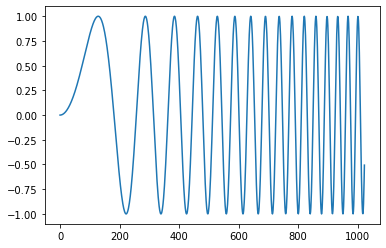

In [19]:
frequency = 1000
min_power = minSecondPower(frequency)
min_number = minNumberToSecondPower(frequency)
function = np.array([square_sin(x) for x in np.linspace(0, 10, 2**min_power)], dtype = complex)
plt.plot(np.real(function));

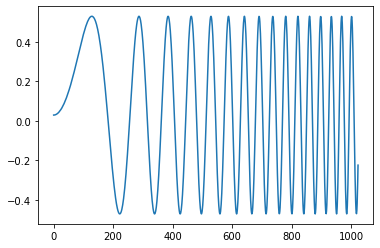

In [20]:
part = 50
FFT(function);
for i in range(function.size - 1, function.size - function.size * part // 100, -1):
    function[i] = 0
FFTReverse(function);
plt.plot(np.real(function));

In [119]:
def compare(f, part):
    frequency = 1000
    min_power = minSecondPower(frequency)
    min_number = minNumberToSecondPower(frequency)
    function = np.array([f(x) for x in np.linspace(0, 10, 2**min_power)], dtype = complex)
    plt.plot(np.real(function));
    
    FFT(function);
    for i in range(function.size - 1, function.size - function.size * part // 100, -1):
        function[i] = 0
    FFTReverse(function);
    plt.plot(np.real(function));

101


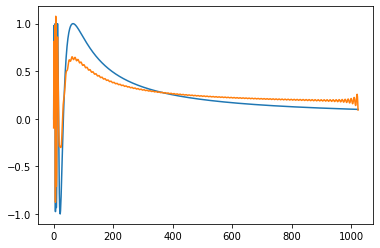

In [122]:
compare(divided_sin, 10)

615


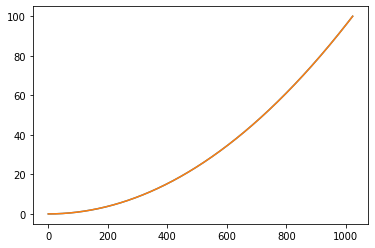

In [117]:
f = lambda x: x * x
compare(f, 40)

1014


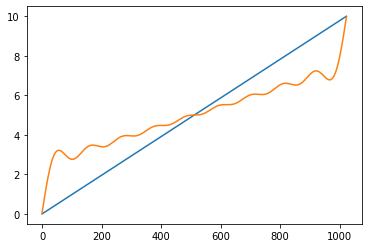

In [111]:
f = lambda x: x 
compare(f, 1)

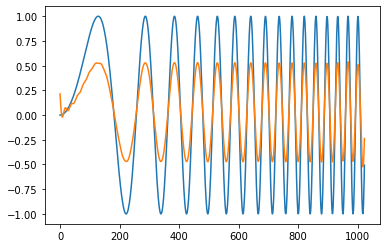

In [56]:
compare(square_sin, 5)

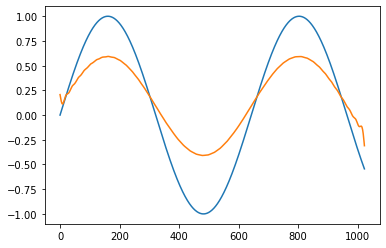

In [57]:
compare(math.sin, 5)

In [68]:
function

array([0.1365082 +0.5195168j , 0.62920038+0.34346557j,
       0.52331288+0.07680832j, ..., 0.18900706+0.1393302j ,
       0.18647358+0.29753049j, 0.1889096 +0.14250634j])